한글 폰트 설정

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq 

In [ ]:
!pip install konlpy

라이브러리 설정

In [2]:
import nltk
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import numpy as np
import matplotlib as mpl

한글 폰트 설정

In [3]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False   # 음수 표시

NanumGothic Eco


In [4]:
fm._rebuild()

파일 불러오기

In [5]:
doc_ko = open('조선일보.txt').read()

워드클라우드용 마스크 설정

In [7]:
mask = np.array(Image.open("셜록.jpg"))

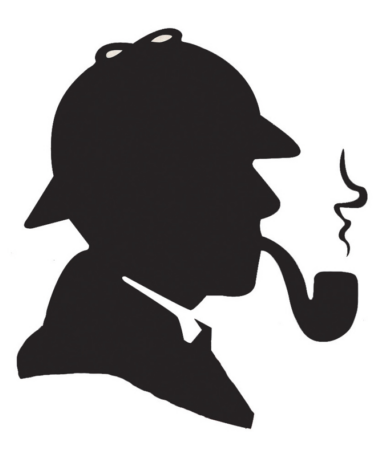

In [8]:
plt.figure(figsize=(15,8))
plt.imshow(mask,cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

워드클라우드 생성

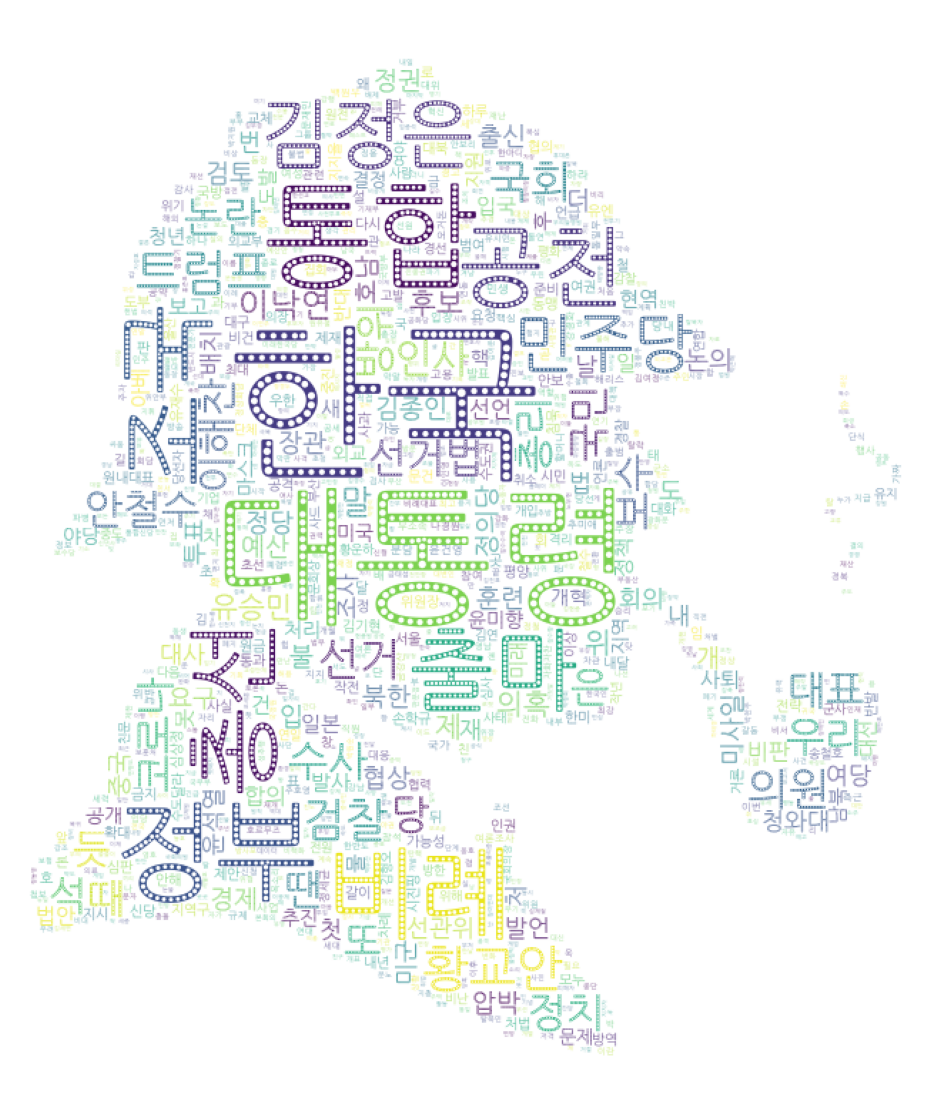

In [9]:
# OKT 클래스를 이용한 명사확인
from konlpy.tag import Okt
t = Okt()
doc_nouns = t.nouns(doc_ko)

ko = nltk.Text(doc_nouns, name="조선일보")
# print(type(ko))
# print(len(ko.tokens))

stop_words = ['것','이','고','전','연','군','의','수','등','비','안','명','선','중','때문',
              '경향신문','국민일보','동아일보','디지털타임스','매일경제','머니투데이',
              '문화일보','서울경제','서울신문','세계일보','아시아경제','이데일리','전자신문',
              '조선일보','중앙일보','파이낸셜뉴스','한겨레','한국경제','한국일보','헤럴드경제',
              '오늘','뉴스','종합','속보','단독','선택','포토','미아','인터뷰']   # 불용어 사전
new_ko = [ ]        # 가용어 사전
for one_word in ko:
  if one_word not in stop_words:  # 불용어가 아닌 것
    new_ko.append(one_word)       # 추가
new_ko = nltk.Text(new_ko, name='조선일보')

# 빈도수 높은 단어 1000개 추출
data2 = new_ko.vocab().most_common(1000) 

# 워드 클라우드 표현을 위한 데이터 생성
wc = WordCloud(background_color='white',
    max_words=1000,
    mask=mask,
    contour_width=0,
    font_path=path).generate_from_frequencies(dict(data2))   # 불용어 빼고 단어의 빈도로

plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.axis("off")
plt.show()

단어들의 사용 횟수 확인 (빈도분석)

In [10]:
most_fre = new_ko.vocab().most_common(50)
most_fre

[('한국', 293),
 ('대통령', 267),
 ('통합', 140),
 ('정부', 126),
 ('비례', 123),
 ('조국', 117),
 ('총선', 109),
 ('출마', 100),
 ('공천', 98),
 ('김정은', 98),
 ('민주당', 93),
 ('황교안', 88),
 ('트럼프', 82),
 ('검찰', 71),
 ('의원', 67),
 ('선거', 67),
 ('국회', 65),
 ('수사', 62),
 ('때', 58),
 ('국민', 58),
 ('안철수', 57),
 ('코로나', 56),
 ('우리', 55),
 ('논란', 55),
 ('선거법', 54),
 ('당', 53),
 ('대표', 53),
 ('정치', 52),
 ('총리', 52),
 ('이해찬', 51),
 ('땐', 50),
 ('방위', 50),
 ('보수', 50),
 ('석', 49),
 ('은', 48),
 ('인사', 47),
 ('듯', 46),
 ('또', 46),
 ('이낙연', 46),
 ('말', 45),
 ('유승민', 45),
 ('후보', 45),
 ('의혹', 44),
 ('위', 44),
 ('제', 44),
 ('김종인', 43),
 ('장관', 43),
 ('불', 43),
 ('더', 43),
 ('정권', 43)]

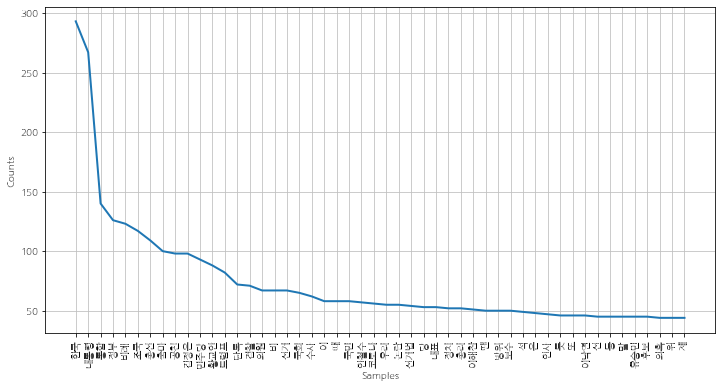

In [11]:
plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

신문사 별 기사수, 단어수 시각화

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

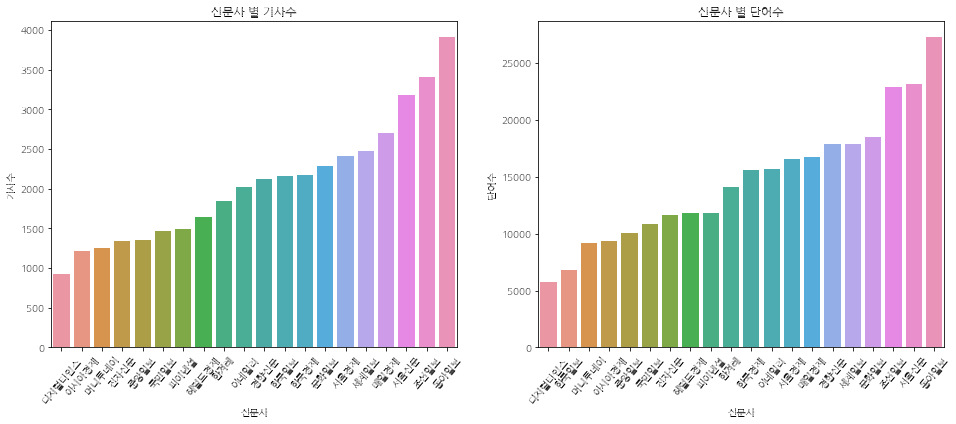

In [13]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('기사수2.csv', encoding='cp949')
df = df.iloc[:20,:]

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('신문사 별 기사수')
df.sort_values(by=['기사수'], ascending=True, axis=0, inplace=True)
sns.barplot(x='신문사', y='기사수', data=df)
plt.xticks(rotation=50)

plt.subplot(1,2,2)
plt.title('신문사 별 단어수')
df.sort_values(by=['단어수'], ascending=True, axis=0, inplace=True)
sns.barplot(x='신문사', y='단어수', data=df)
plt.xticks(rotation=50)

신문사 별 민주당 vs 미래당(통합당) 언급 수에 따른 scatter plot
* 진보 : 민주당
* 보수 : 미래당, 통합당

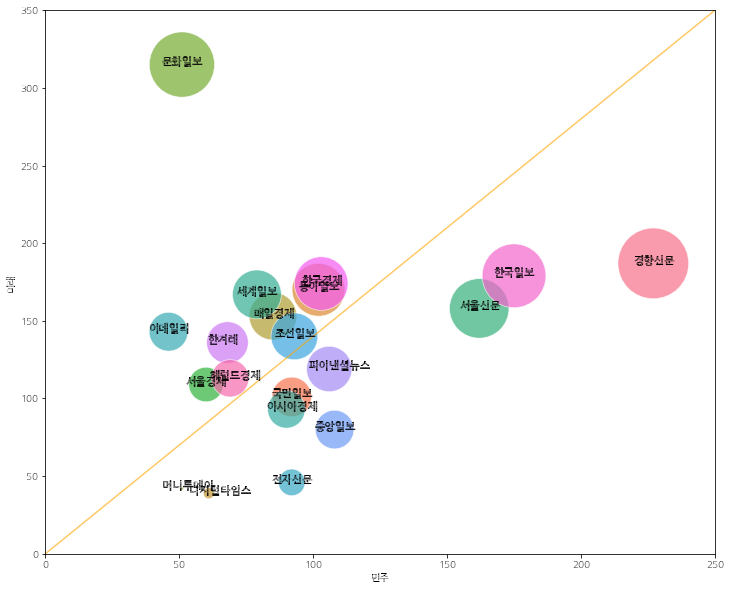

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dat = pd.read_csv('민주vs미래.csv', encoding='cp949')
dat['total'] = dat.민주 + dat.미래

plt.figure(figsize=(12,10))
plt.xlim(0,250)
plt.ylim(0,350)

plt.plot([0,250],[0,350],'-', alpha=.6, color='orange')
sns.scatterplot(x='민주', y='미래', hue='신문사', alpha=.7, data=dat, size="total", sizes=(10, 5000), legend=False)

font = {'family': font_name, 'weight': 'bold', 'size':11}
for i in range(20):
  plt.text(dat.민주[i]-7.5, dat.미래[i], dat.신문사[i], fontdict=font)

plt.show()